In [1]:
%load_ext autoreload
%autoreload 2

# PCA analisis

This notebook performs a PCA analysis of the significance-filtered data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'sans-serif',
        'size'   : 15}
matplotlib.rc('font', **font)
from local_utils import get_mean, get_mean2, pca_comp, pca_variance
import seaborn as sns

We have now load the list of genes found after significance filtering (142).

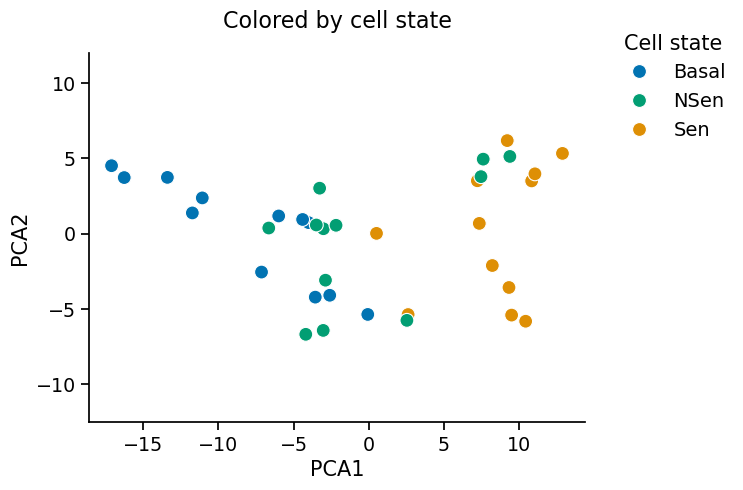

In [3]:
df_filteredKS_means = pd.read_csv("df_filteredKS.csv", sep="\t")

df_filteredKS_means.columns = df_filteredKS_means.columns.str.replace('_mean','')

pca_df = pca_comp(df_filteredKS_means, sorting='Cell state')

plt.figure()
with sns.plotting_context("notebook", font_scale=1.25): #style cound be changed to "talk" or "notebook"
    ax = sns.scatterplot(x="PCA1", y="PCA2",
                data=pca_df, 
                hue="Cell state",                   
                s=100,
                palette = sns.color_palette(['#0173b2','#029e73', '#de8f05'])) #from colorblind palette in order: blue, green, orange
    plt.xlabel("PCA1")
    plt.ylabel("PCA2")
    plt.title("Colored by cell state", pad = 18, fontsize = 16)
    
sns.move_legend(ax, "upper right", bbox_to_anchor=(1.32, 1.1), frameon = False, title = "Cell state", fontsize = 14)
  
# Hide the right and top spines
ax.spines[['right', 'top']].set_visible(False) #--> adjust to remove lines in figures

plt.gca().set_aspect('equal', 'datalim')

plt.savefig('figures/fig_PCA_significance_cell_state.pdf', dpi = 500, bbox_inches = 'tight',  transparent=True)

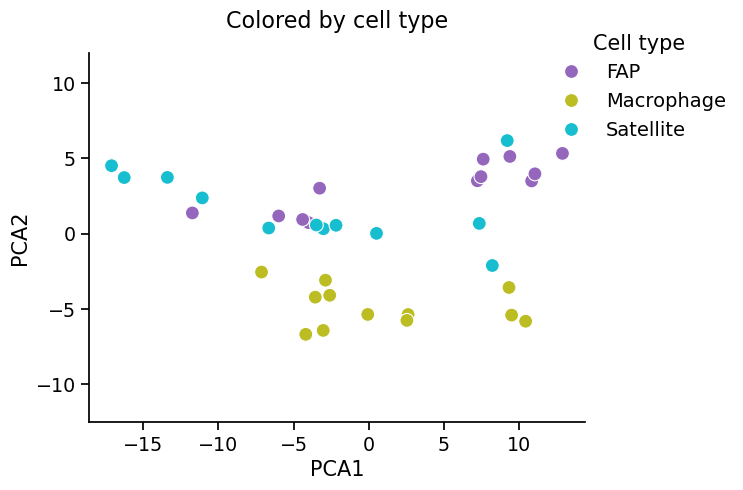

In [4]:
pca_df = pca_comp(df_filteredKS_means, sorting='Cell type')

plt.figure()
with sns.plotting_context("notebook", font_scale=1.25): #style cound be changed to "talk" or "notebook"
    ax = sns.scatterplot(x="PCA1", y="PCA2",
                data=pca_df, 
                hue="Cell type",                   
                s=100,
                palette = sns.color_palette(['#9467bd','#bcbd22', '#17becf'])) #from colorblind palette in order: blue, green, orange
    plt.xlabel("PCA1")
    plt.ylabel("PCA2")
    plt.title("Colored by cell type", pad = 18, fontsize = 16)
    
sns.move_legend(ax, "upper right", bbox_to_anchor=(1.32, 1.1), frameon = False, title = "Cell type", fontsize = 14)
  
# Hide the right and top spines
ax.spines[['right', 'top']].set_visible(False) #--> adjust to remove lines in figures

plt.gca().set_aspect('equal', 'datalim')

plt.savefig('figures/fig_PCA_significance_cell_type.pdf', dpi = 500, bbox_inches = 'tight',  transparent=True)

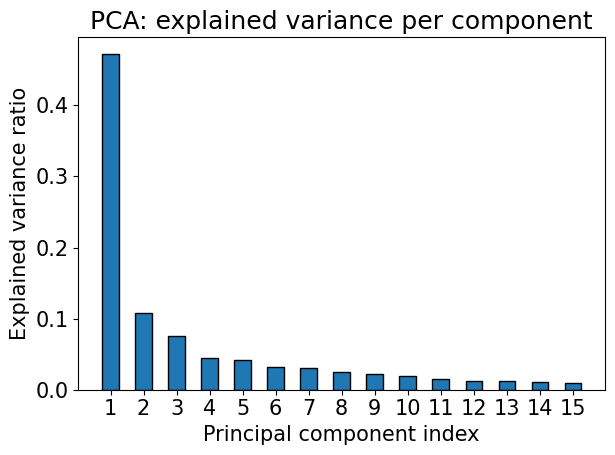

In [5]:
[ind_variance, loadings] = pca_variance(df_filteredKS_means)
n_features = len(ind_variance)

plt.figure()

plt.bar(range(1, 16), ind_variance[:15], align='center', edgecolor='black', width=0.5)

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title('PCA: explained variance per component')
plt.xticks(range(1, 16))

plt.tight_layout()
plt.savefig('figures/fig_pca_variance_significance.pdf')
plt.show()

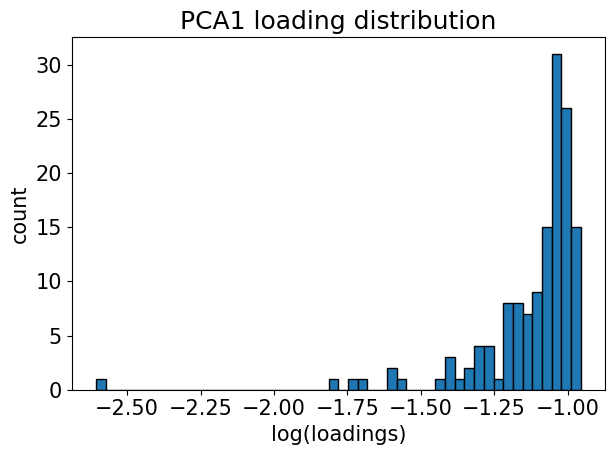

In [6]:
plt.figure()

plt.hist(np.log10(np.abs(loadings[0])),bins=50,edgecolor='black')

plt.xlabel('log(loadings)')
plt.ylabel('count')
plt.title('PCA1 loading distribution')
#plt.xlim([-5,-1.6])
#plt.xticks([-5,-4,-3,-2],[-5,-4,-3,-2])
#plt.legend()

plt.tight_layout()
plt.savefig('figures/fig_load_dist_PCA1_significance.pdf')
plt.show()

We now generate the loading plot:

In [7]:
geneids = df_filteredKS_means.iloc[:,0].values

lut = pd.read_csv("geneID_ens_symbol.csv", sep="\t")
lut = lut.drop('Unnamed: 0', axis=1)
ecfs_genes = ['Fabp3','Lncpint','Pcnp','Luc7l3','AI427809','Cd59a']
ecfs_ids = []
for i, egene in enumerate(ecfs_genes):
    ecfs_ids.append(lut[lut['symbol']==egene]['ensID'].to_string(index=False))

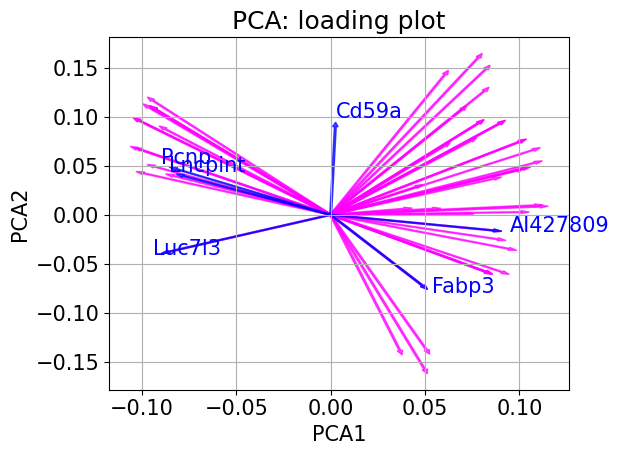

In [8]:
plt.figure()
plt.xlabel('PCA1')
plt.ylabel('PCA2')

rng = np.random.default_rng(12345)
ivec = rng.choice(len(geneids),50)
for i in ivec:
    genename = lut[lut['ensID']==geneids[i]]['symbol'].to_string(index=False)
    # Add the name of the variable near the arrow
    # plt.annotate(genename, # variable name
    #              (loadings[0,i]*1.1,
    #               loadings[1,i]*1.1),
    #              color='magenta')
    # Add an arrow representing the variable on the new axis
    plt.arrow(0, 0,
              loadings[0,i],
              loadings[1,i],
              color='magenta',
              alpha=0.7, 
              width=1e-3
             )

for feature in ecfs_ids:
    i = np.where(geneids == feature)[0][0]
    genename = lut[lut['ensID']==feature]['symbol'].to_string(index=False)
    # Add the name of the variable near the arrow
    plt.annotate(genename, # variable name
                 (loadings[0,i]*1.1,
                  loadings[1,i]*1.1),
                 color='blue')
    # Add an arrow representing the variable on the new axis
    plt.arrow(0, 0,
              loadings[0,i],
              loadings[1,i],
              color='blue',
              alpha=0.7, 
              width=1e-3
             )
    
#plt.xlim(-0.016,0.016)
#plt.ylim(-0.016,0.016)
plt.title('PCA: loading plot')
plt.grid(True)

plt.tight_layout()
plt.savefig('figures/fig_loading_plot_significance.pdf')
plt.show()